##Mask Detection

---
The goal of this challenge is to build a model that can detect whether a person is wearing a mask or not. You would be downloading the data from kaggle and then building you model while we guide you through the steps.


##Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/omkargurav/face-mask-dataset What you will have to do, is to search for a way that allows you to download the dataset from kaggle directly into google colab (or your google drive). This process would save you the trouble from downloading the dataset locally and then uploading it to use it in colab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

{}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Once the dataset is downloaded, it is going to be zipped, and in order to use it, you need to unzip it. Here you have the option of unzipping it in the environment or in your google drive.

In [ ]:
!unzip "/content/face-mask-dataset.zip" -d "/content/gdrive/MyDrive/MaskDetection"

##Importing the Libraries

Now, it is time to import the libraries that we need. 

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this you have to use the **os** library that would help you creating folders, and moving images from a folder to another. In simple terms, this library helps you perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time. 

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
root_dir = "/content/gdrive/MyDrive/MaskDetection/data"

class_names = ['with_mask', 'without_mask']

os.mkdir(os.path.join(root_dir, 'train'))
os.mkdir(os.path.join(root_dir, 'eval'))
os.mkdir(os.path.join(root_dir, 'test'))

In [ ]:
for c in class_names:
  #Create subdirectory for each class in the train and test folder
  os.mkdir(os.path.join(root_dir, 'test', c))
  os.mkdir(os.path.join(root_dir, 'train', c))
  os.mkdir(os.path.join(root_dir, 'eval', c))

In [ ]:
#For each class, take the images, and select 500 samples for training and 100 for evaluation, and 50 for testing
for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]
  selected_images = random.sample(images, 500)
  for image in selected_images:
      source_path = os.path.join(root_dir, c, image)
      target_path = os.path.join(root_dir, 'train', c, image)
      shutil.move(source_path, target_path)

for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]
  selected_images = random.sample(images, 100)
  for image in selected_images:
      source_path = os.path.join(root_dir, c, image)
      target_path = os.path.join(root_dir, 'eval', c, image)
      shutil.move(source_path, target_path)

for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]              
  selected_images = random.sample(images, 50)
  for image in selected_images:
      source_path = os.path.join(root_dir, c, image)
      target_path = os.path.join(root_dir, 'test', c, image)
      shutil.move(source_path, target_path)

##Inspecting the Dataset

Now we will see some characteristics of our dataset.

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
training_path = "/content/gdrive/MyDrive/MaskDetection/data/train"
validation_path = "/content/gdrive/MyDrive/MaskDetection/data/eval"
testing_path = "/content/gdrive/MyDrive/MaskDetection/data/test"

To make sure that everythinh went correctly, write a code that counts the number of images that you have in your training directory for each of the 2 categories: with_mask and without_mask

In [ ]:
with_mask_training = len(os.listdir(os.path.join(training_path, "with_mask")))
without_mask_training = len(os.listdir(os.path.join(training_path, "without_mask")))

print(f"We have {with_mask_training} images with mask and {without_mask_training} images without mask in our training set")

We have 500 images with mask and 500 images without mask in our training set


Do the same for the validation and the testing folders

In [ ]:
with_mask_val = len(os.listdir(os.path.join(validation_path, "with_mask")))
without_mask_val = len(os.listdir(os.path.join(validation_path, "without_mask")))

print(f"We have {with_mask_val} images with mask and {without_mask_val} images without mask in our Validation set")

We have 100 images with mask and 100 images without mask in our Validation set


In [ ]:
with_mask_testing = len(os.listdir(os.path.join(testing_path, "with_mask")))
without_mask_testing = len(os.listdir(os.path.join(testing_path, "without_mask")))

print(f"We have {with_mask_testing} images with mask and {without_mask_testing} images without mask in our testing set")

We have 50 images with mask and 50 images without mask in our testing set


Write a code that shows 5 random images for people with mask from your training set. 

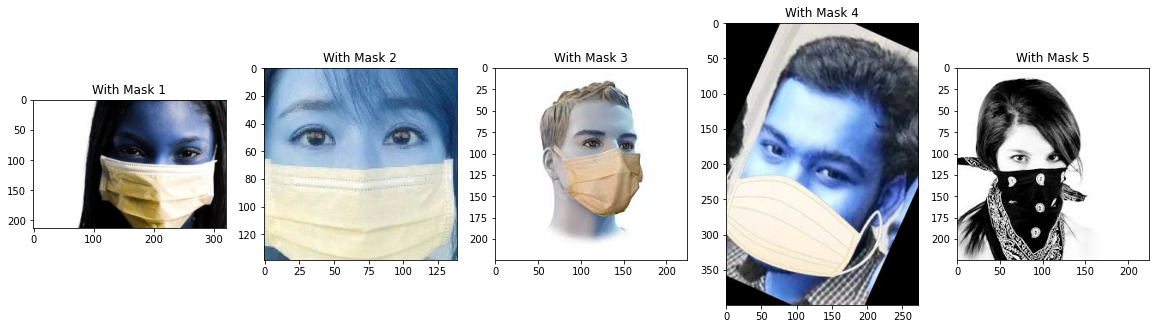

In [ ]:
all_images = os.listdir(os.path.join(training_path,"with_mask"))
display_images = random.sample(all_images, 5)

fig = plt.figure(figsize=(20, 7))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(training_path, "with_mask", image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1,5, index+1)
  plt.imshow(img)
  plt.title(f"With Mask {index+1}")

Do the same for people without mask.

In [ ]:
all_images = os.listdir(os.path.join(training_path,"without_mask"))
display_images = random.sample(all_images, 5)

fig = plt.figure(figsize=(20, 7))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(training_path, "without_mask", image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1,5, index+1)
  plt.imshow(img)
  plt.title(f"Without Mask {index+1}")

##Modeling

Define a model structure that can deal with the images that we have to classify them between the 2 classes.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

Train the model that you defined on the training data and evaluate it on the validation data. Feel free to tune the hyperparameters of your model until you reach a satisfying result on the validation set. </br>
**N.B:** Make sure to save the model training history in a variable to plot later the learning curve.

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
	training_path,
	target_size=(128, 128),
  classes = ['without_mask', 'with_mask'],
	class_mode='binary',
)

val_generator = datagen.flow_from_directory(
	validation_path,
	target_size=(128, 128),
  classes = ['without_mask', 'with_mask'],
	class_mode='binary',
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data = val_generator, verbose = 1)

Epoch 1/10
15/32 [=============>................] - ETA: 1:03 - loss: 0.7408 - accuracy: 0.5373

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


32/32 [==============================] - 169s 5s/step - loss: 0.6559 - accuracy: 0.6650 - val_loss: 0.4621 - val_accuracy: 0.7550
Epoch 2/10
32/32 [==============================] - 17s 539ms/step - loss: 0.3888 - accuracy: 0.8360 - val_loss: 0.3003 - val_accuracy: 0.8950
Epoch 3/10
32/32 [==============================] - 17s 535ms/step - loss: 0.3206 - accuracy: 0.8720 - val_loss: 0.3106 - val_accuracy: 0.9000
Epoch 4/10
32/32 [==============================] - 18s 546ms/step - loss: 0.2545 - accuracy: 0.9000 - val_loss: 0.2711 - val_accuracy: 0.9050
Epoch 5/10
32/32 [==============================] - 17s 542ms/step - loss: 0.2608 - accuracy: 0.9030 - val_loss: 0.3259 - val_accuracy: 0.8550
Epoch 6/10
32/32 [==============================] - 17s 540ms/step - loss: 0.2167 - accuracy: 0.9200 - val_loss: 0.2464 - val_accuracy: 0.9150
Epoch 7/10
32/32 [==============================] - 18s 546ms/step - loss: 0.1758 - accuracy: 0.9380 - val_loss: 0.2665 - val_accuracy: 0.9150
Epoch 8/10
3

Plot the accuracy curve and see if your model is overfit.

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<Figure size 432x288 with 0 Axes>

The model is not overfit

##Evaluate the model


Now you will evaluate the model that you built on the testing set that you kept aside since the beginning.

In [ ]:
test_generator = datagen.flow_from_directory(
	testing_path,
	target_size=(128, 128),
  classes = ['without_mask', 'with_mask'],
	class_mode='binary',
  shuffle = False,
)

Found 100 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 16s 5s/step - loss: 0.2920 - accuracy: 0.9000


[0.2919642925262451, 0.8999999761581421]

Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

In [ ]:
predictions = model.predict(test_generator)
predictions = predictions>0.5
predictions = predictions.astype(int)

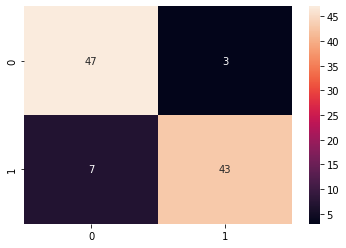

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_generator.classes, predictions)
sns.heatmap(cm, annot=True)

**What did you learn about your model from this confusion matrix?**

The model performs well, but it recognizes the class 0 better than it recognizes class 1.

##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

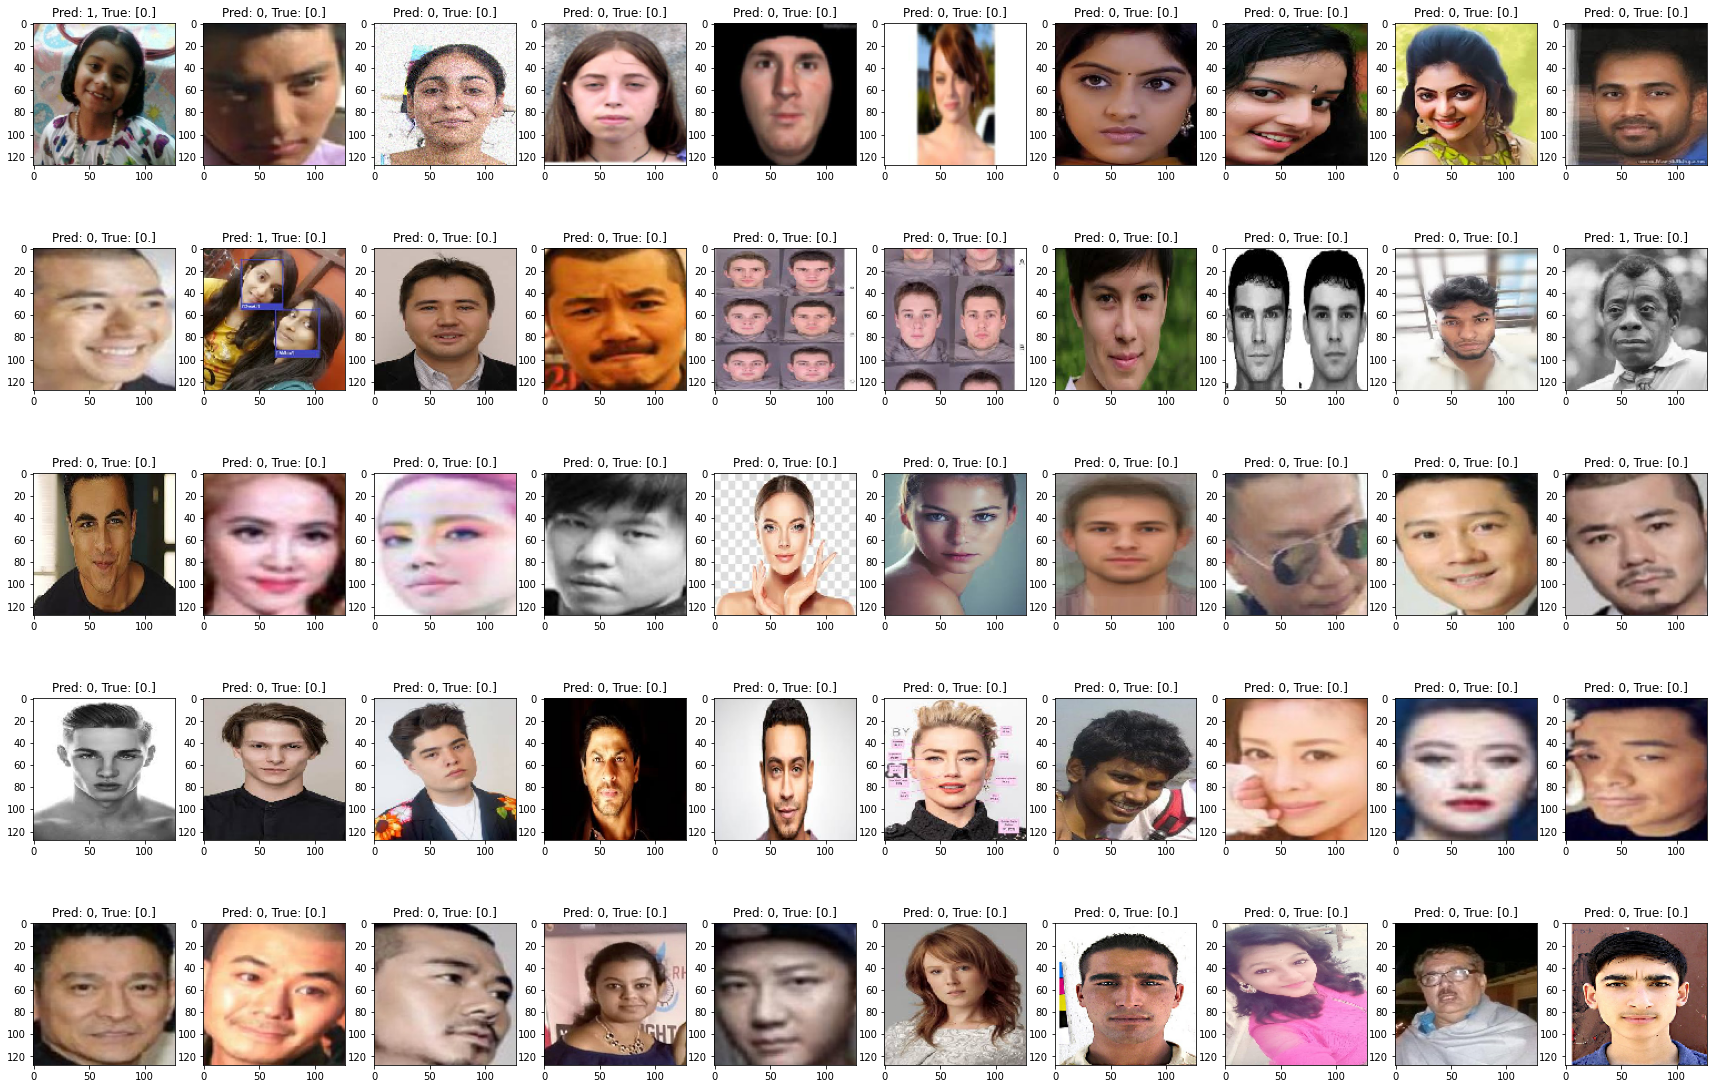

In [ ]:
test_generator.reset()
test_generator.batch_size = 1
fig = plt.figure(figsize=(30, 20))
for i in range(50):
  img = test_generator.next()
  prediction = int(model.predict(img[0])>0.5)

  fig.add_subplot(5,10, i+1)
  plt.imshow(img[0][0])

  plt.title(f"Pred: {prediction}, True: {img[1]}")

In [ ]:
fig = plt.figure(figsize=(30, 20))
for i in range(50):
  img = test_generator.next()
  prediction = int(model.predict(img[0])>0.5)

  fig.add_subplot(5,10, i+1)
  plt.imshow(img[0][0])

  plt.title(f"Pred: {prediction}, True: {img[1]}")

**Try to derive some conclusions from the wrong predictions that your model has made. Meaning: why do you think these predictions were wrong?**

- **Without mask:** The image with index (1,1) was classified as 1 but the truth is 0. Maybe the model was tricked by the bounding box around the face and considered it as a mask for example.
- **With mask:** The image with index (4,7) was classified as 0 but the truth is 1. Maybe the training data does not contain images for people showing only one quarter of their face, and this is why it was not classified correctly.

**Think of a way that you can use in order to improve the performance of your model, and implement it**

* Getting More Data
* Training for longer
* Transfer Learning

**Your Friend took your code and ran it again, but obtained different accuracies on the different sets. How do you interpret this?**

At the beginning we sampled data from the big dataset, and unless seeds are the same, each time we would have different samples, and when the training data differs definitely we will obtain another model with another performance. Even the validation and testing data would be different and of course the accuracies would be diffrent as well. 